In [34]:
import tensorflow as tf
import numpy as np

# First example : Linear classifier

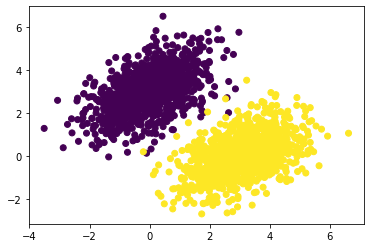

Loss at step 0: 0.8075
Loss at step 5: 0.0803
Loss at step 10: 0.0616
Loss at step 15: 0.0493
Loss at step 20: 0.0412
Loss at step 25: 0.0359
Loss at step 30: 0.0324
Loss at step 35: 0.0301


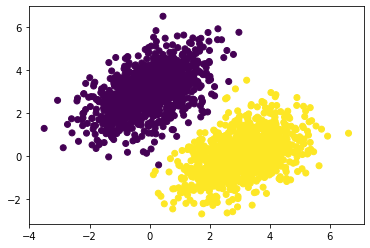

In [50]:
# Linear classifier

num_samples_per_class = 1000 # Number of points
negative_samples = np.random.multivariate_normal(
  mean = [0, 3],
  cov = [[1, 0.5],[0.5, 1]],
  size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(
  mean = [3, 0],
  cov = [[1, 0.5],[0.5, 1]],
  size = num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32) # Stacking of the two lists

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32"))) # Targets. 0 if negative_samples and 1 else

import matplotlib.pyplot as plt # Display
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

# Creation of our Linear classifier
input_dim = 2 # points as input
output_dim = 1 # target value as output
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim))) # Coefficient to optimize. W = [[w1] , [w2]]
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,))) # biais b 

def model(inputs):
  return tf.matmul(inputs, W) + b # Forward pass function
# prediction is pred = W*input + b = w1*x + w2*y + b

def square_loss(targets, predictions): # The square_loss will minimize the "distance" between or points and the line
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

# Training step function
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss 

# Batch training loop
for step in range(40):
  loss = training_step(inputs, targets)
  if(step % 5 == 0):
    print(f"Loss at step {step}: {loss:.4f}")

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()